In [1]:
import json
import sys
from train_cnfqi import run
import seaborn as sns
import tqdm
import matplotlib.pyplot as plt 
import numpy as np

# Interpretability

In [ ]:
import shap
printed_bg, printed_fg, performance, nfq_agent, X, X_test = run(verbose=False, is_contrastive=True, evaluations=2, force_left=5)
model = nfq_agent._nfq_net

In [ ]:
# explain how the input to the first layer of the model explains the outcome
e = shap.DeepExplainer(model, X)
shap_values = e.shap_values(X_test)

# Force left=0

In [4]:
import json
from train_cnfqi import run
num_iter=15
results = {'fqi': {}, 'cfqi': {}}
for i in range(num_iter):
    print(str(i))
    printed_bg, printed_fg, performance, nfq_agent = run(verbose=False, is_contrastive=True, evaluations=2, force_left=0)
    results['cfqi'][i] = performance
    printed_bg, printed_fg, performance, nfq_agent = run(verbose=False, is_contrastive=False, evaluations=2, force_left=0)
    results['fqi'][i] = performance
    
#     with open('force_left=0.json', 'w') as f:
#         json.dump(results, f)  

0
Fg trained after 141 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
Fg trained after 406 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
1
Fg trained after 94 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
Fg trained after 486 epochs
BG stayed up for steps:  [98, 1000]
FG stayed up for steps:  [98, 1000]
2
Fg trained after 0 epochs
BG stayed up for steps:  [95, 121]
FG stayed up for steps:  [73, 105]
Fg trained after 0 epochs
BG stayed up for steps:  [79, 98]
FG stayed up for steps:  [79, 98]
3
Fg trained after 46 epochs
BG stayed up for steps:  [1000, 155]
FG stayed up for steps:  [1000, 1000]
Fg trained after 177 epochs
BG stayed up for steps:  [1000, 161]
FG stayed up for steps:  [1000, 161]
4
Fg trained after 709 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
Fg trained after 170 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up fo

In [7]:
fqi_results = []
cfqi_results = []
for alg in ['cfqi', 'fqi']:
    for key in results[alg]:
        if alg == 'fqi':
            fqi_results.extend(results[alg][key])
        else:
            cfqi_results.extend(results[alg][key])

/home/amandyam/.conda/envs/research/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/amandyam/.conda/envs/research/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Force left = 0')

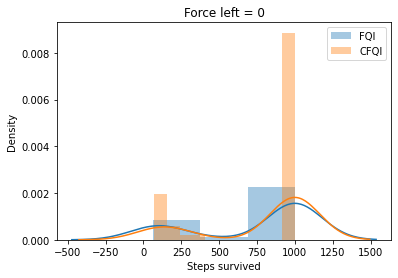

In [11]:
sns.distplot(fqi_results, label='FQI')
sns.distplot(cfqi_results, label='CFQI')
plt.legend()
plt.xlabel("Steps survived")
plt.title("Force left = 0")